In [1]:
import re, string,os
from glob import glob as gb
import pandas as pd
from tqdm import tqdm
from collections import Counter
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from functions import *

base_path = "/home/ruben/Documents/GitHub/ParlaMintCase"

In [4]:
# Number of Speakers & Parties / Session
plotting.style_('tab20',12)

def find_info(language):
    data = data_loader.period(language=language,data_version="lemmatized",start_date="2019-05",end_date="2020-12")
    data['date'] = [utils.find_date(x) for x in data['id']]
    data = utils.add_metadata(data,language)
    d = []
    for day in set(data['date']):
        t = data[data['date'] == day]
        d.append([day,len(set(t['speaker_party_name'])),len(set(t['speaker_id'])),t['words'].sum()])
    d = pd.DataFrame(d,columns="date unique_parties unique_speakers length_words".split(' '))
    d = d[d['date'].str.contains('2019|2020')].sort_values('date').reset_index(drop=True)
    return d

def plot_(d,col,title,language):
    fig,ax = plt.subplots(figsize=(25,5))
    p = plt.bar(x=d['date'],height=d[col],edgecolor="black",width=0.6)
    plt.xlabel("Days",fontsize=16,labelpad=20)
    plt.ylabel("N",fontsize=16,labelpad=20)
    ax.tick_params(axis='x', pad=0)
    ax.xaxis.set_tick_params(rotation=45)
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % 7 != 0:
            label.set_visible(False)
    # m, b = np.polyfit([c for c,i in enumerate(d['date'])], d['unique_speakers'], 1)
    # plt.plot(d['date'], m*d['unique_speakers'] + b)
    plt.title(title + f" ({language.upper()})",fontsize=20)
    fig.savefig(f'{base_path}/results/plots/metadata/{col}-{language}.png',dpi=350, bbox_inches='tight')
    plt.show()

found 717 files in: /home/ruben/Documents/GitHub/ParlaMintCase/data/original/bg/bg-ana-txt/


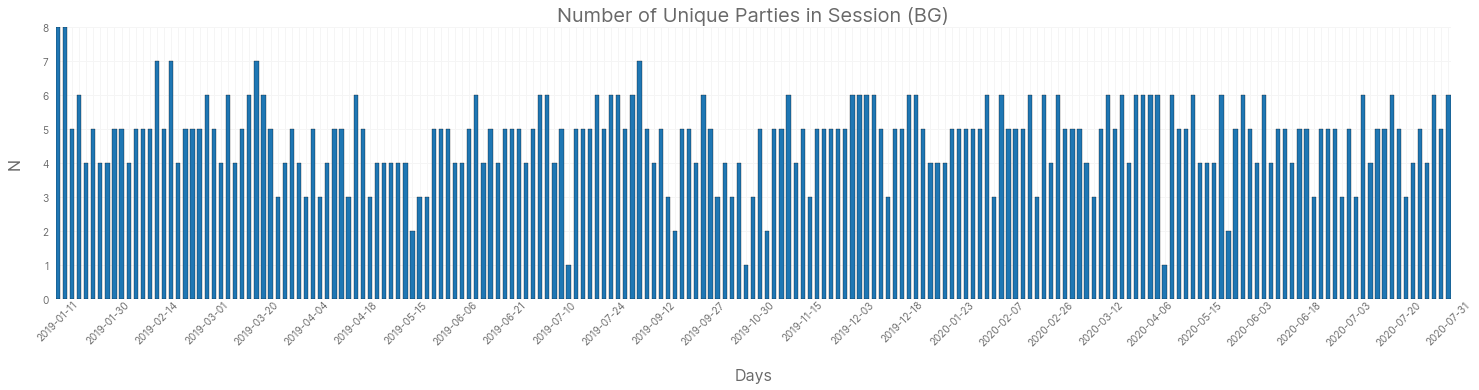

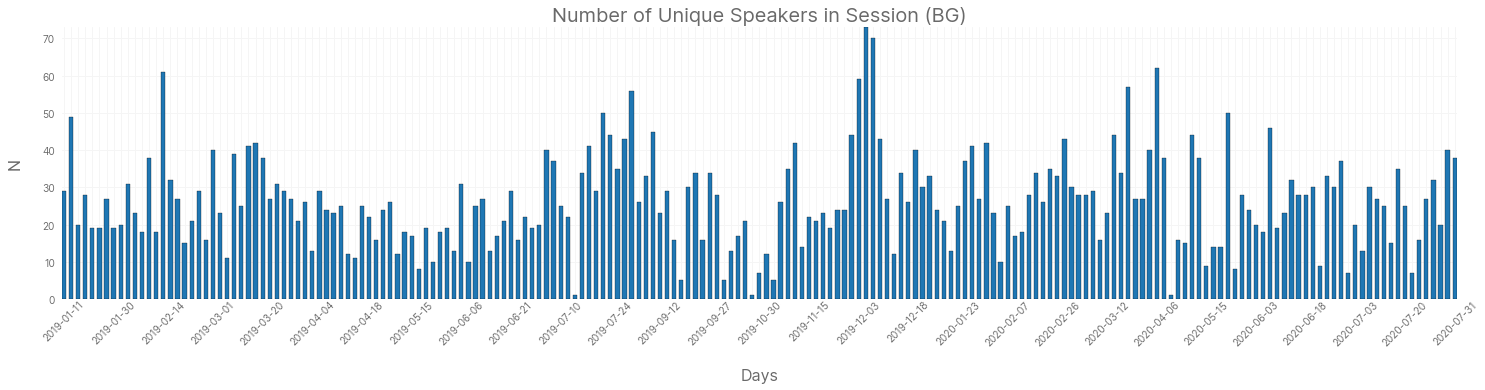

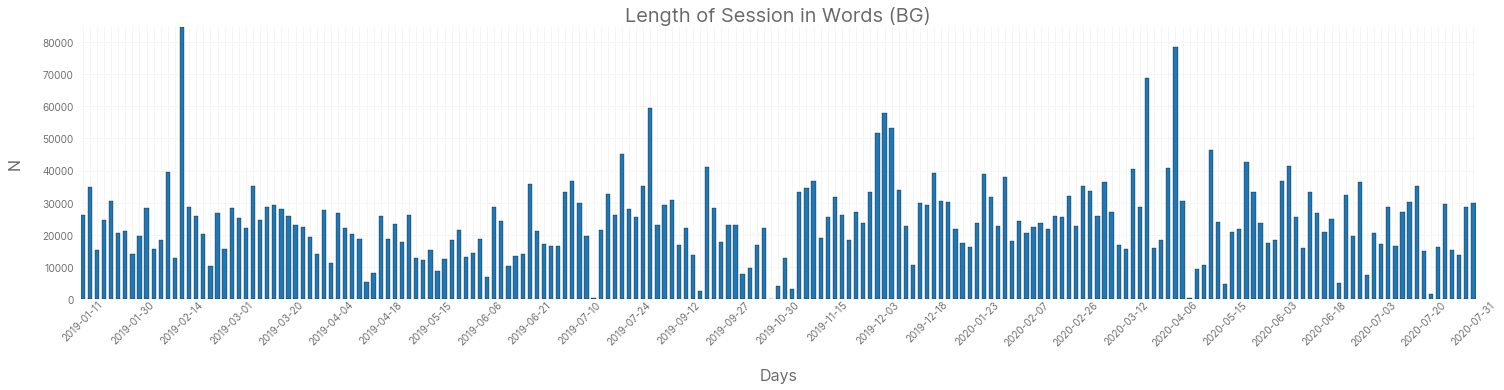

found 414 files in: /home/ruben/Documents/GitHub/ParlaMintCase/data/original/si/si-ana-txt/


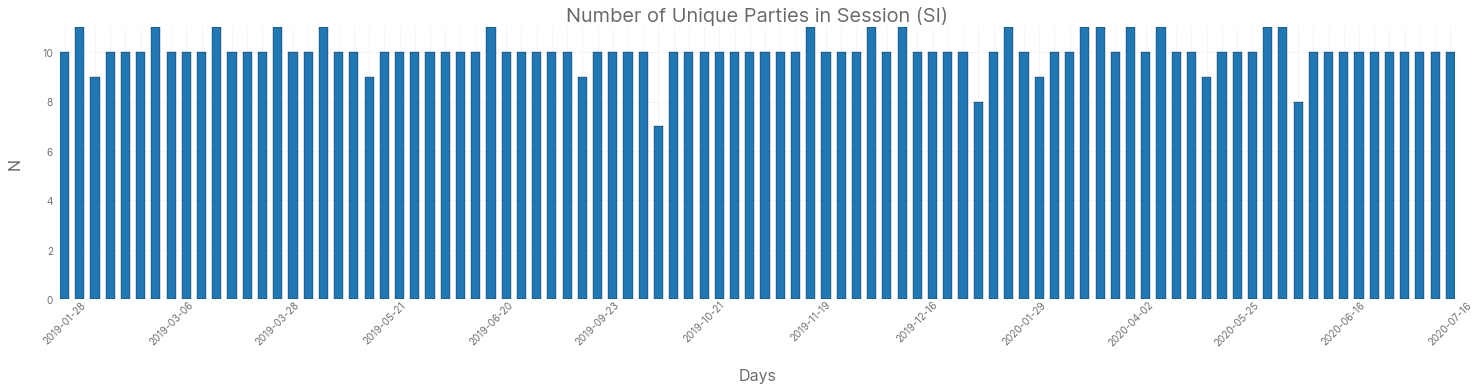

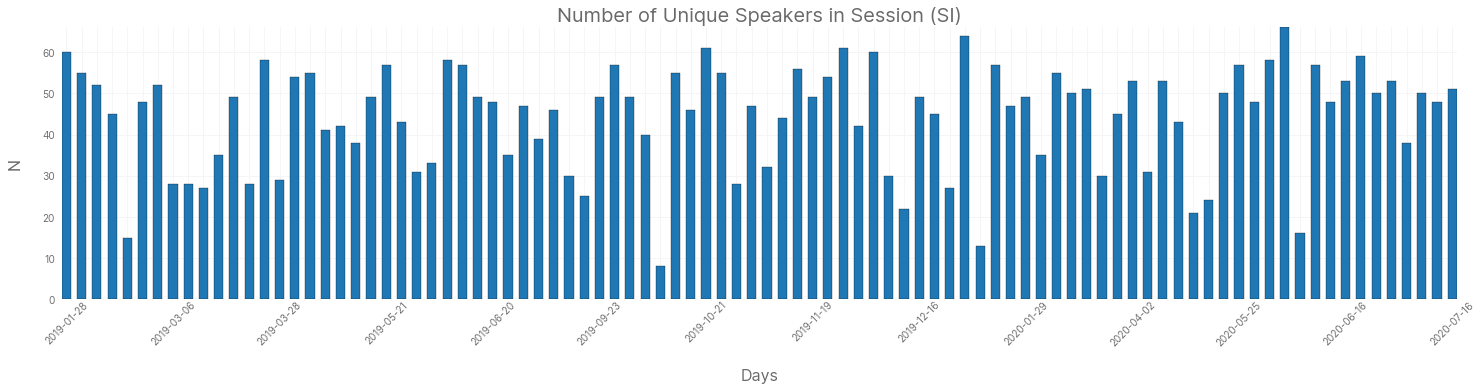

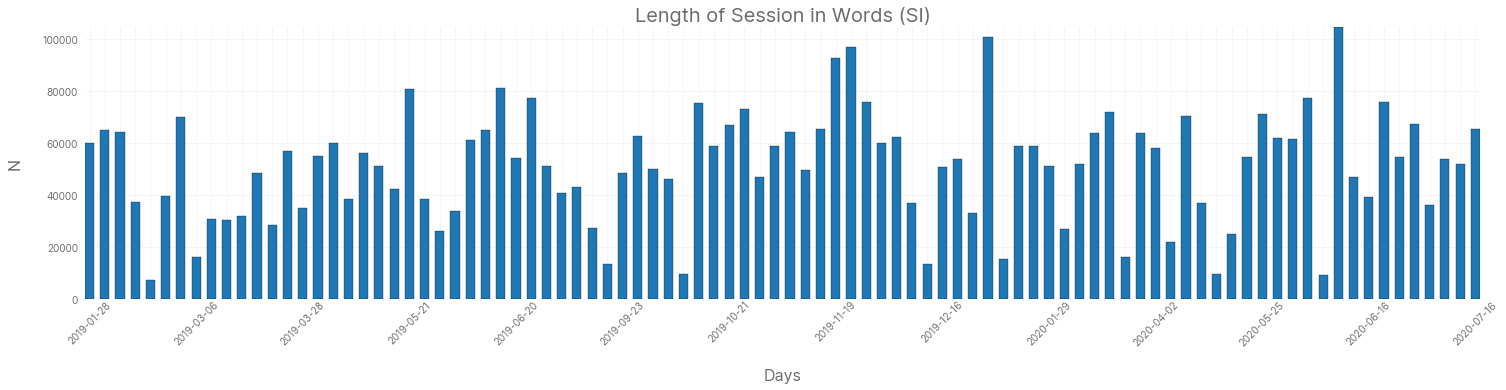

found 516 files in: /home/ruben/Documents/GitHub/ParlaMintCase/data/original/pl/pl-ana-txt/


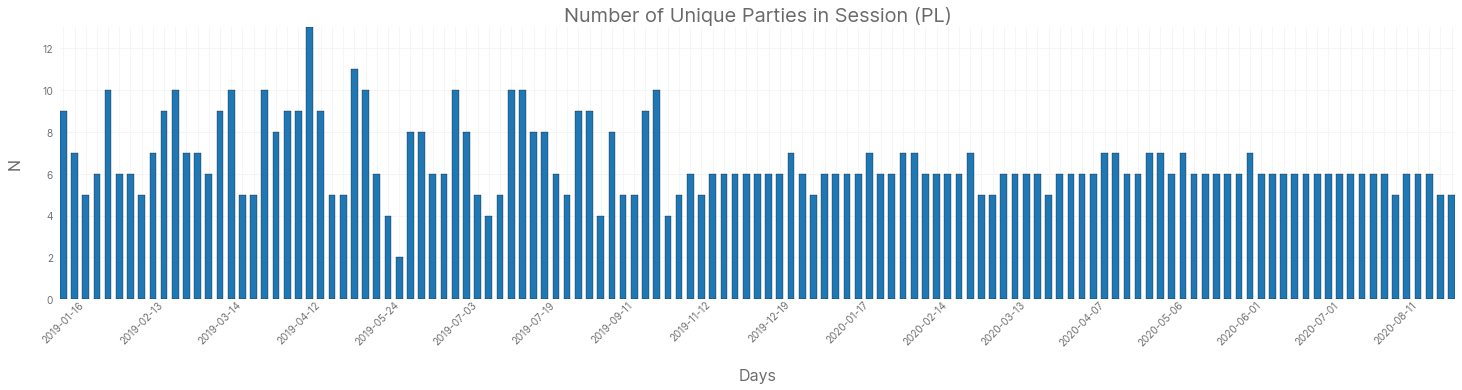

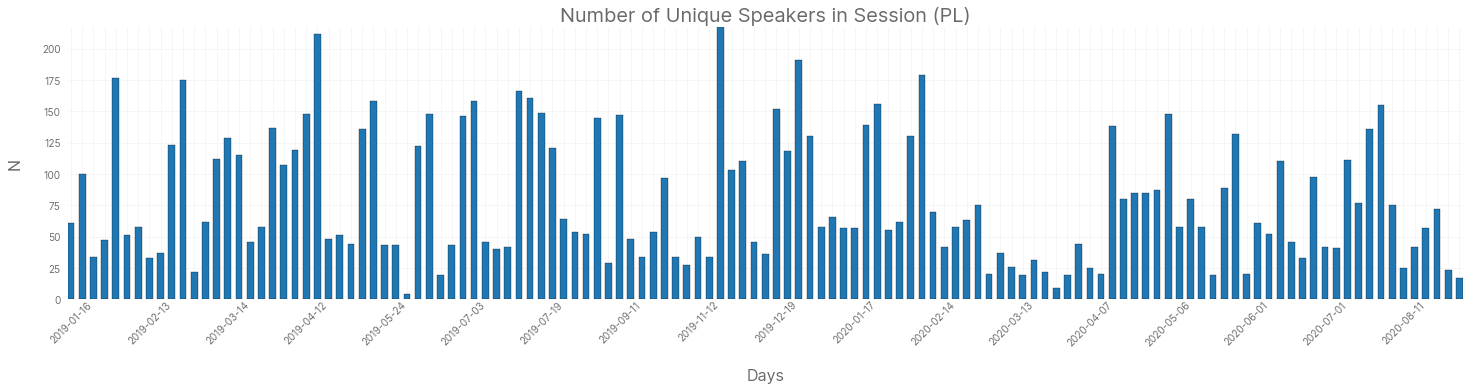

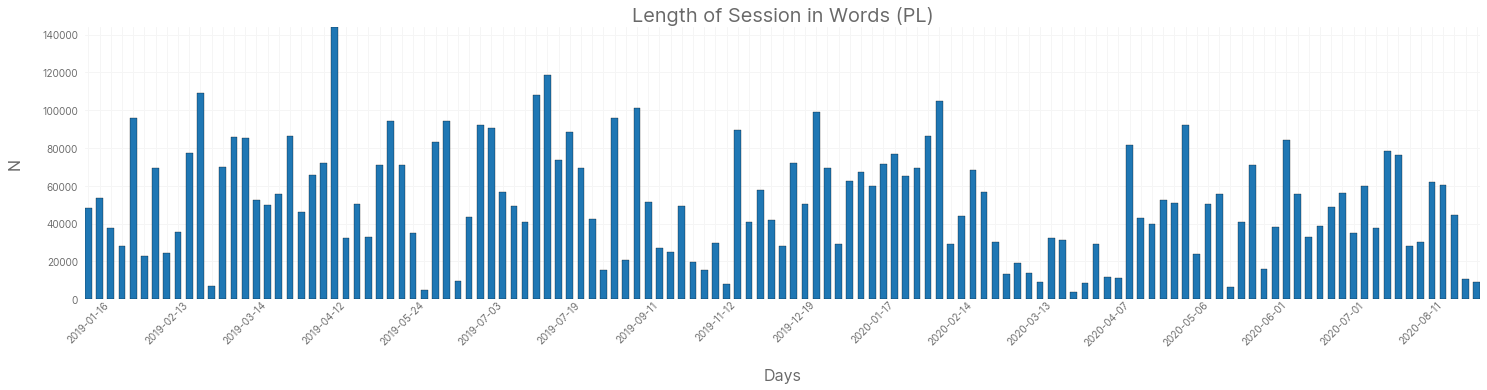

In [10]:
for l in ['bg','si','pl']:
    d = find_info(l)

    for e in [["unique_parties","Number of Unique Parties in Session"],["unique_speakers","Number of Unique Speakers in Session"],["length_words","Length of Session in Words"]]:
        plot_(d,e[0],e[1],l)

In [37]:
def plot_nchar(language,start_day,end_day):
    data = data_loader.period(language=language,data_version="lemmatized",start_date=start_day[:7],end_date=end_day[:7])
    data['date'] = [utils.find_date(x) for x in data['id']]
    data = utils.add_metadata(data,language)
    days = utils.day_generator(start_day,end_day)
    d = []

    for day in tqdm(days):
        t = " ".join(list(data[data['date'] == day]['text'].astype(str)))
        t = len(t)
        d.append([day,t])
    ax = pd.DataFrame(d,columns='day nchar'.split(' ')).plot.bar(x='day',y='nchar',figsize=(35,5),legend=False)
    plt.title("Number of Characters per Session" + f" ({language.upper()})",fontsize=20)
    plt.locator_params(nbins=24)
    fig = ax.get_figure()
    fig.savefig(f'{base_path}/results/plots/metadata/nchar-alldates-{language}.png',dpi=350, bbox_inches='tight')
    plt.show()
    plt.close()

looking for data in  /media/ruben/Elements/ParlaMint/gb/gb-ana-txt/
found 335 files
100%|██████████| 458/458 [00:04<00:00, 105.11it/s]


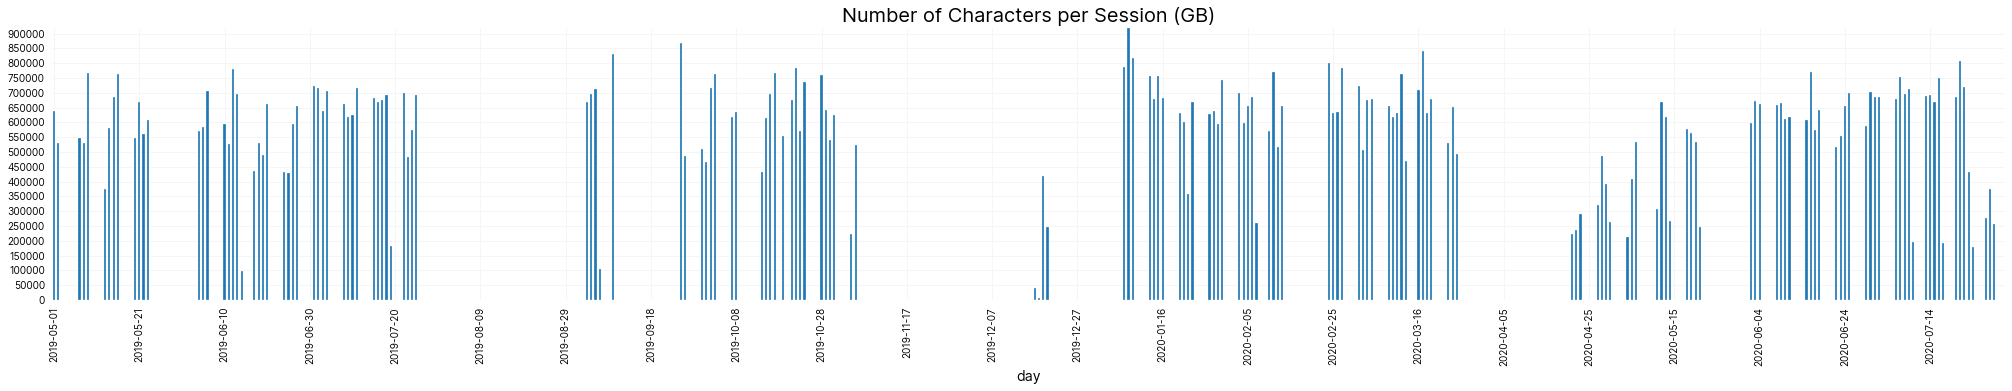

looking for data in  /media/ruben/Elements/ParlaMint/nl/nl-ana-txt/
found 1025 files
100%|██████████| 458/458 [00:03<00:00, 116.56it/s]


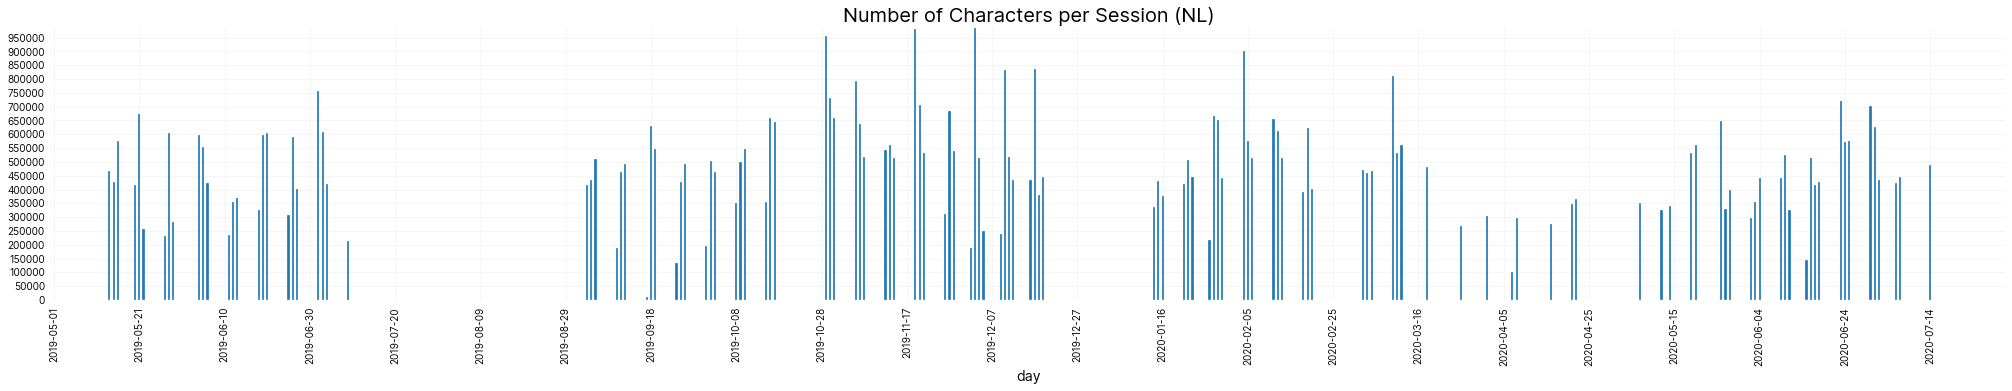

looking for data in  /media/ruben/Elements/ParlaMint/it/it-ana-txt/
found 136 files
100%|██████████| 458/458 [00:00<00:00, 596.60it/s]


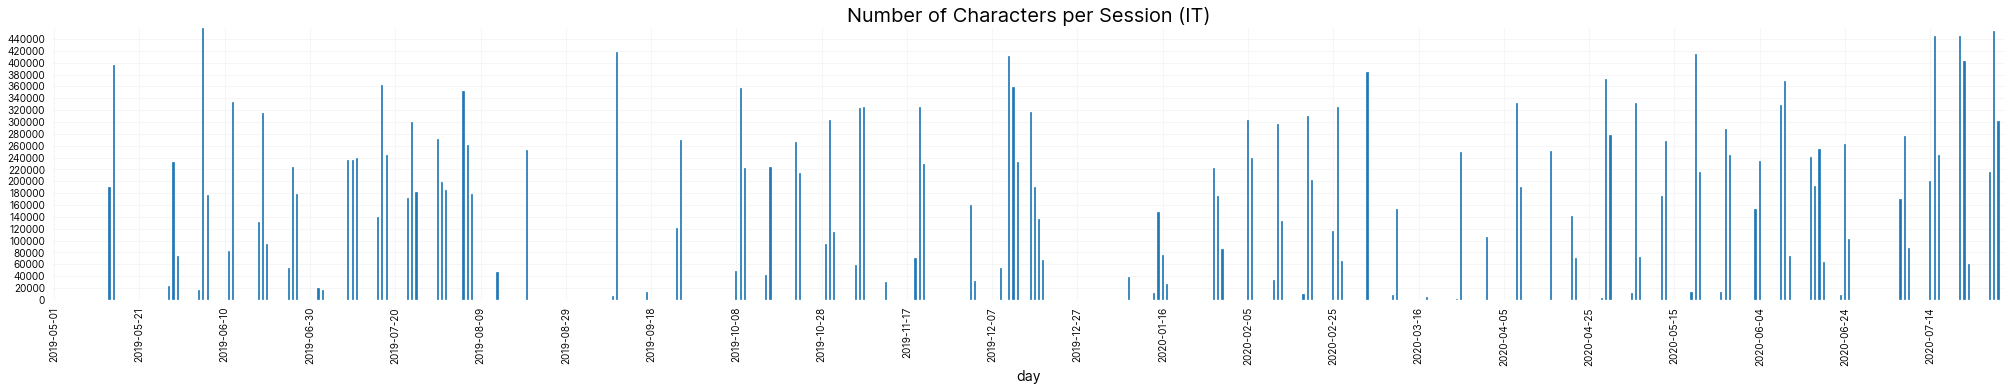

looking for data in  /media/ruben/Elements/ParlaMint/es/es-ana-txt/
found 45 files
100%|██████████| 458/458 [00:01<00:00, 448.40it/s]


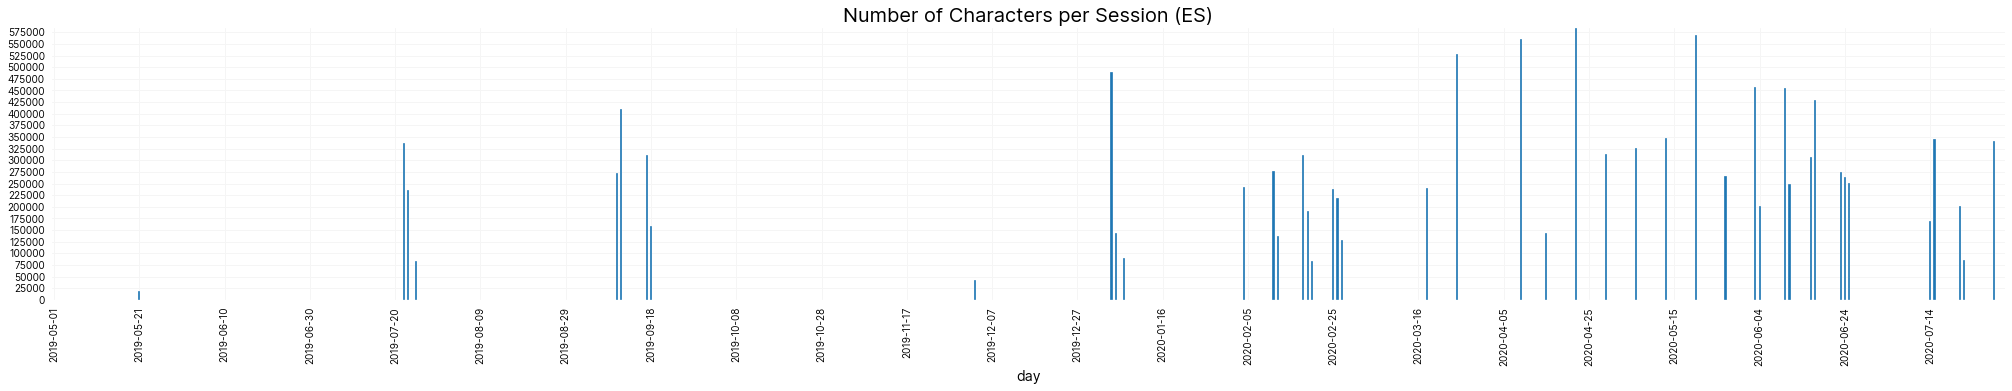

looking for data in  /media/ruben/Elements/ParlaMint/pl/pl-ana-txt/
found 105 files
100%|██████████| 458/458 [00:04<00:00, 95.41it/s] 


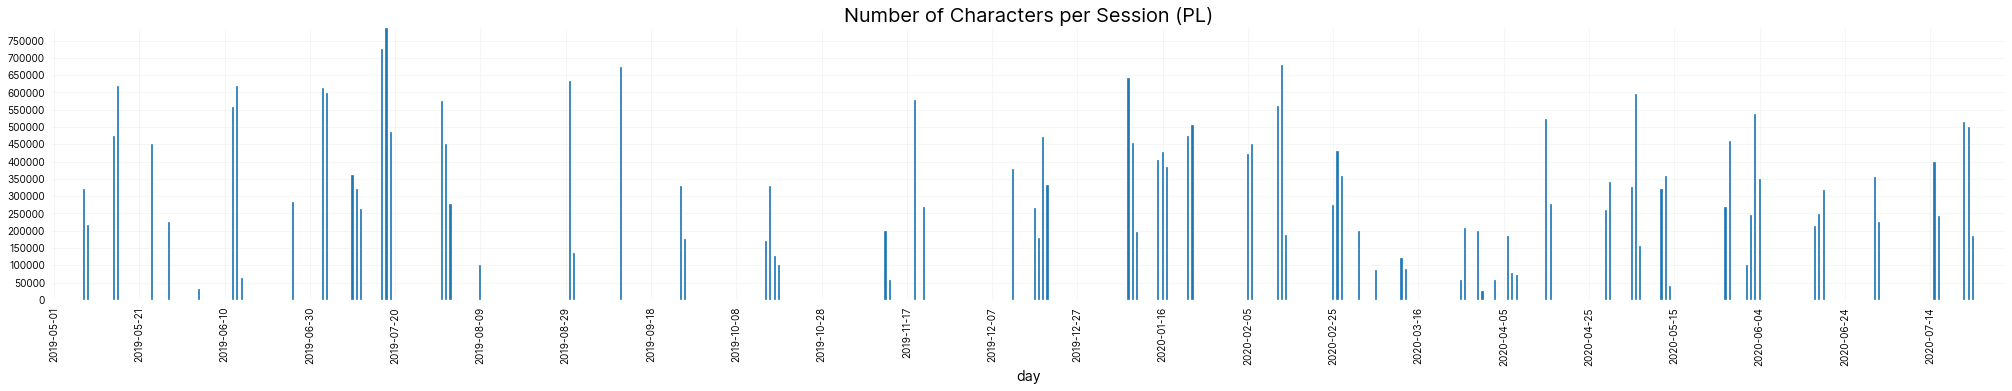

looking for data in  /media/ruben/Elements/ParlaMint/bg/bg-ana-txt/
found 151 files
100%|██████████| 458/458 [00:02<00:00, 211.26it/s]


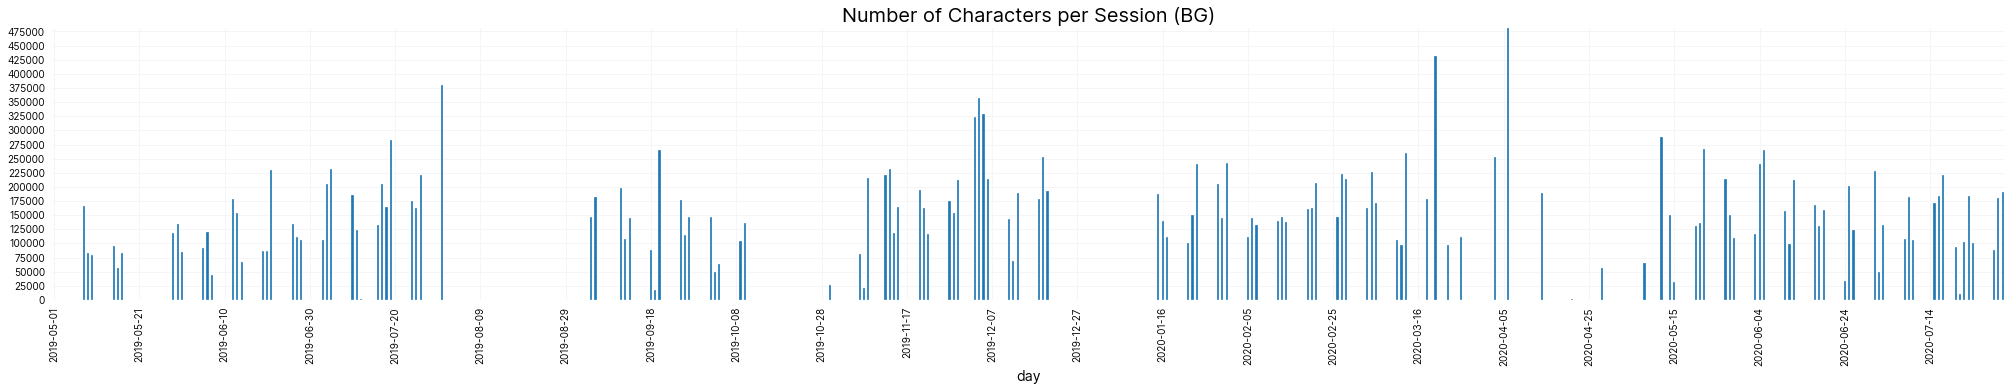

In [38]:
for l in "gb nl it es pl bg".split(' '):
    plot_nchar(l,"2019-05-01","2020-08-01")